In [1]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

from scipy.interpolate import interp1d

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
#obs_date='ut20150819'                           #observation date
#obj_name='Wasp4'                                #object name   
#midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

###################
###   WASP52b   ###
###################
obs_date='ut20160811'
#obs_date='ut20160922'
obj_name='Wasp52'

midtime=['2016-08-11T04:51:00']               #time of midtransit, Wasp-52b, Transit1
#midtime=['2016-09-22T04:44:00']               #time of midtransit, Wasp-52b, Transit2

##################
###   Hats8b   ###
##################
#obs_date='ut20170723'                           #observation date
#obs_date='ut20170828'
#obj_name='Hats8'                                #object name  

#midtime=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
#midtime=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2


path='/Volumes/ermay_ext/Magellan/'+obs_date+'/'
data_path=path+obj_name+'_Spec/'      #path to where your data is saved
flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH=path+'SaveData_'+obj_name+'/'

wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn

2048 4096


In [2]:
## LOAD IN FILES

ShiftSpec=np.load(SAVEPATH+'ShiftedSpec_All.npz')
FlatSpec=np.load(SAVEPATH+'FlattenedSpectra.npz')


spec=ShiftSpec['data']
wave=ShiftSpec['wave']
pixs=ShiftSpec['pixels']
ysft=ShiftSpec['yshift']

fwhm=FlatSpec['fwhm_av']
gaus=FlatSpec['gaus_params']
bkgd=FlatSpec['bkgd_params']
phte=FlatSpec['pht_err']

In [3]:
print spec.shape
print wave.shape
print pixs.shape
print ysft.shape
print ' '
print fwhm.shape
print gaus.shape
print bkgd.shape
print phte.shape

(9, 145, 8249)
(9, 145, 8249)
(9, 145, 8249)
(9, 145)
 
(9, 145)
(9, 145, 8249, 4)
(9, 145, 8249, 2)
(9, 145, 8249)


In [4]:
n_obj=spec.shape[0]
n_exp=spec.shape[1]
n_pix=spec.shape[2]

times=np.linspace(1,n_exp,n_exp)
pixel=np.linspace(1,n_pix,n_pix)

# interpolate onto same grid as target.

wave0=wave[0,:,~np.isnan(spec[0,0,:])].T

n_pix0=wave0.shape[1]
pixel0=pixel[~np.isnan(spec[0,0,:])]


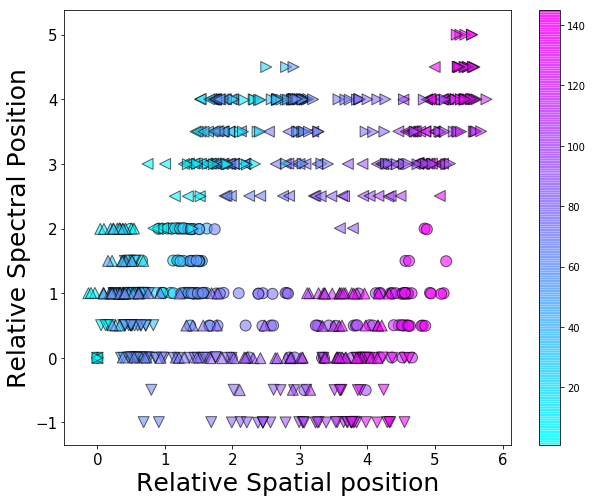

In [5]:
o=8
plt.figure(figsize=(10,8))
plt.scatter(gaus[0,:,4000,1]-gaus[0,0,4000,1],ysft[0,:],marker='o',s=120,c=times,cmap=matplotlib.cm.cool,edgecolors='black',alpha=0.6)
plt.scatter(gaus[2,:,4000,1]-gaus[2,0,4000,1],ysft[2,:],marker='v',s=120,c=times,cmap=matplotlib.cm.cool,edgecolors='black',alpha=0.6)
plt.scatter(gaus[3,:,4000,1]-gaus[3,0,4000,1],ysft[3,:],marker='^',s=120,c=times,cmap=matplotlib.cm.cool,edgecolors='black',alpha=0.6)
plt.scatter(gaus[5,:,4000,1]-gaus[5,0,4000,1],ysft[5,:],marker='<',s=120,c=times,cmap=matplotlib.cm.cool,edgecolors='black',alpha=0.6)

plt.scatter(gaus[8,:,4000,1]-gaus[8,0,4000,1],ysft[8,:],marker='>',s=120,c=times,cmap=matplotlib.cm.cool,edgecolors='black',alpha=0.6)


plt.colorbar()


plt.xlabel('Relative Spatial position',fontsize=25)
plt.ylabel('Relative Spectral Position',fontsize=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('/Users/ermay/Desktop/SCAN.pdf')

(9, 145, 8249)
(145, 4921)
(4921,)


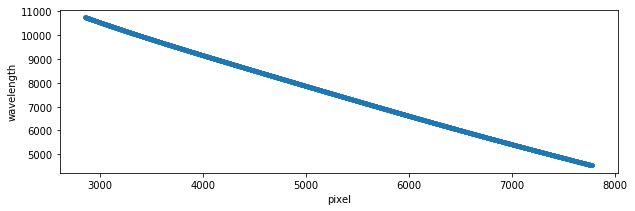

(-2, -1)

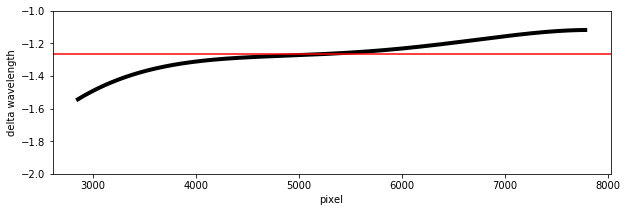

In [6]:
print wave.shape
print wave0.shape
print pixel0.shape

test=np.ediff1d(wave0[0,:])

plt.figure(figsize=(10,3))
plt.plot(pixel0, wave0[0,:],'.')
plt.ylabel('wavelength')
plt.xlabel('pixel')
plt.show()

plt.figure(figsize=(10,3))
plt.clf()
plt.plot(pixel0[:-1],test,color='black',linewidth=4.0)
plt.axhline(y=np.nanmedian(test),color='red')
plt.ylabel('delta wavelength')
plt.xlabel('pixel')
plt.ylim(-2,-1)

--------------------
   OBJECT:  0
--------------------
  ---->  0


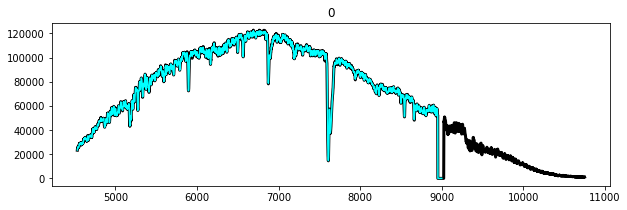

  ---->  10
  ---->  20
  ---->  30
  ---->  40
  ---->  50


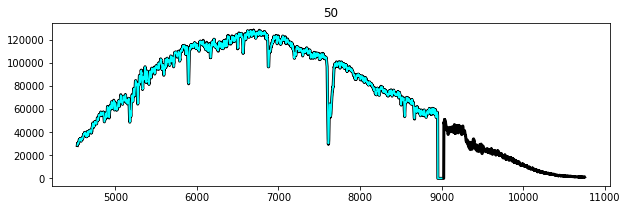

  ---->  60
  ---->  70
  ---->  80
  ---->  90
  ---->  100


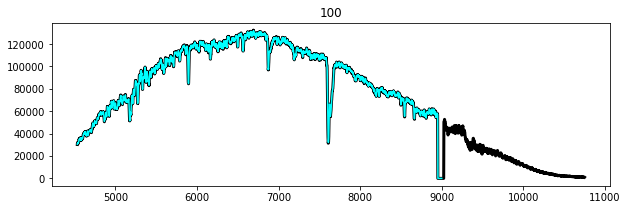

  ---->  110
  ---->  120
  ---->  130
  ---->  140
--------------------
   OBJECT:  1
--------------------
  ---->  0


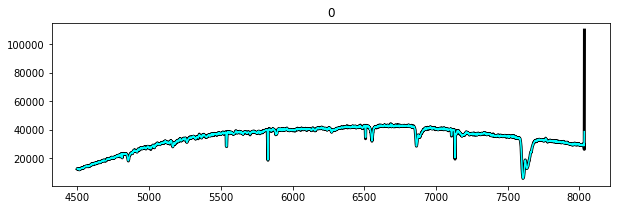

  ---->  10
  ---->  20
  ---->  30
  ---->  40
  ---->  50


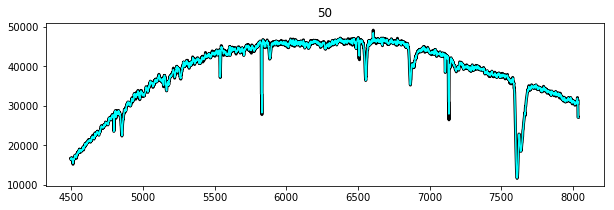

  ---->  60
  ---->  70
  ---->  80
  ---->  90
  ---->  100


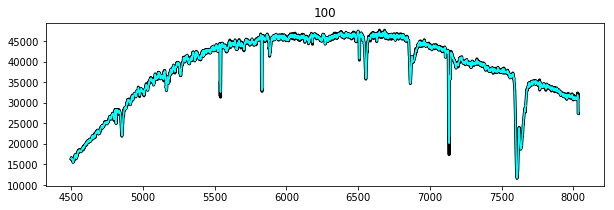

  ---->  110
  ---->  120
  ---->  130
  ---->  140
--------------------
   OBJECT:  2
--------------------
  ---->  0


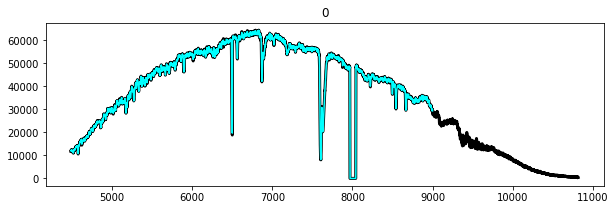

  ---->  10
  ---->  20
  ---->  30
  ---->  40
  ---->  50


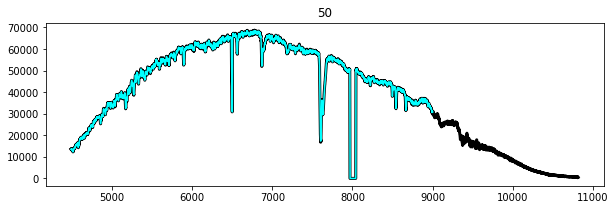

  ---->  60
  ---->  70
  ---->  80
  ---->  90
  ---->  100


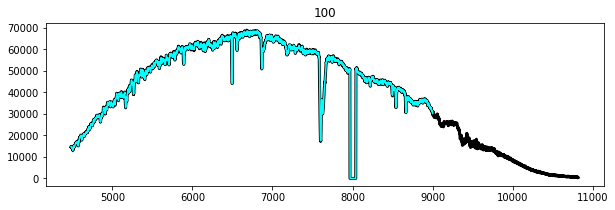

  ---->  110
  ---->  120
  ---->  130
  ---->  140
--------------------
   OBJECT:  3
--------------------
  ---->  0


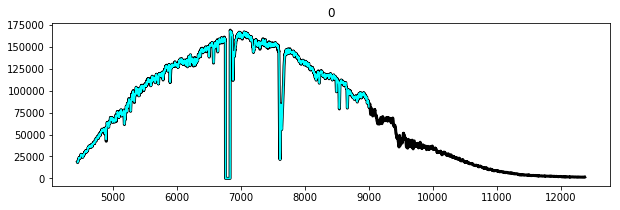

  ---->  10
  ---->  20
  ---->  30
  ---->  40
  ---->  50


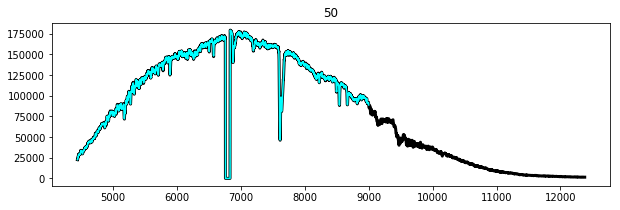

  ---->  60
  ---->  70
  ---->  80
  ---->  90
  ---->  100


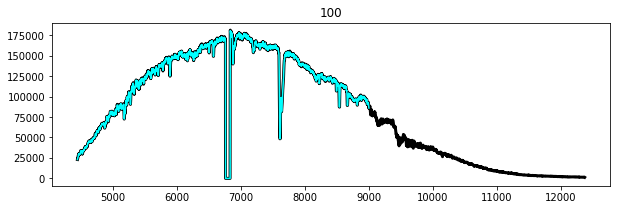

  ---->  110
  ---->  120
  ---->  130
  ---->  140
--------------------
   OBJECT:  4
--------------------
  ---->  0


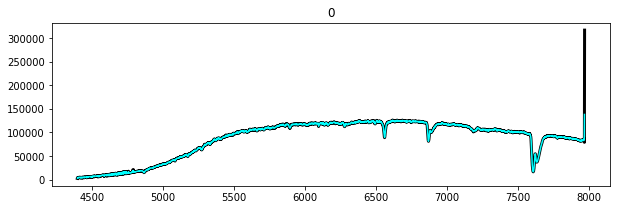

  ---->  10
  ---->  20
  ---->  30
  ---->  40
  ---->  50


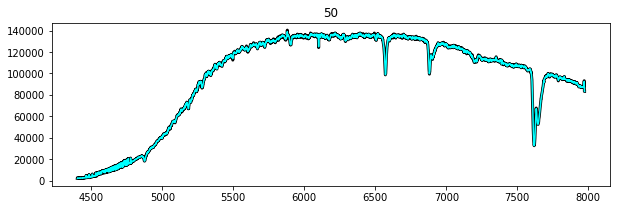

  ---->  60
  ---->  70
  ---->  80
  ---->  90
  ---->  100


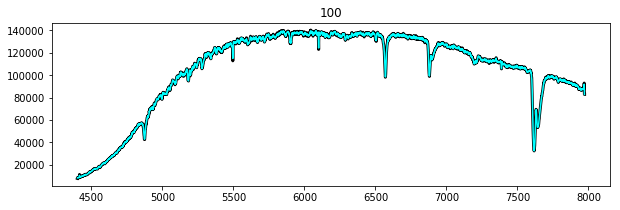

  ---->  110
  ---->  120
  ---->  130
  ---->  140
--------------------
   OBJECT:  5
--------------------
  ---->  0


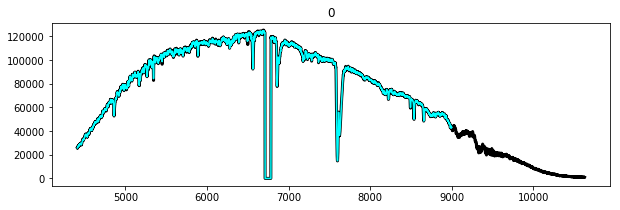

  ---->  10
  ---->  20
  ---->  30
  ---->  40
  ---->  50


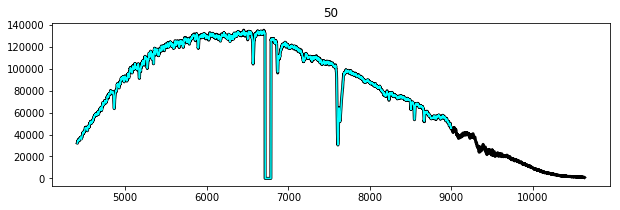

  ---->  60
  ---->  70
  ---->  80
  ---->  90
  ---->  100


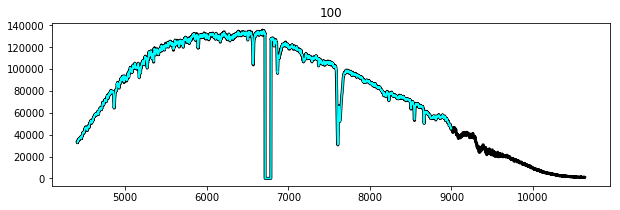

  ---->  110
  ---->  120
  ---->  130
  ---->  140
--------------------
   OBJECT:  8
--------------------
  ---->  0


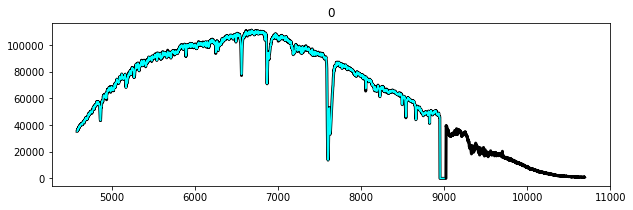

  ---->  10
  ---->  20
  ---->  30
  ---->  40
  ---->  50


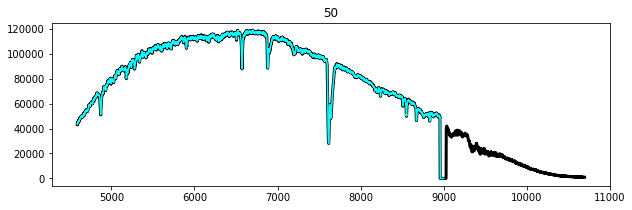

  ---->  60
  ---->  70
  ---->  80
  ---->  90
  ---->  100


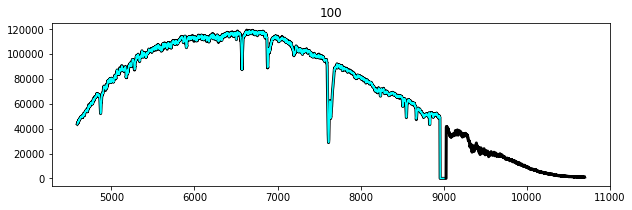

  ---->  110
  ---->  120
  ---->  130
  ---->  140


In [7]:
start=3000
final=9000
deltw=np.abs(np.nanmedian(test))
num_pts=np.int((final-start)/deltw)

new_wave=np.linspace(start,final,num_pts)

new_spec=np.empty([n_obj,n_exp,num_pts])*np.nan

#new_fwhm=np.empty([n_obj,n_exp])*np.nan
new_gaus=np.empty([n_obj,n_exp,num_pts,4])*np.nan
new_bkgd=np.empty([n_obj,n_exp,num_pts,2])*np.nan
new_phte=np.empty([n_obj,n_exp,num_pts])*np.nan


for i in range(0,n_obj):
    if i==6 or i==7 or i==9:
        continue
    print '--------------------'
    print '   OBJECT: ', i
    print '--------------------'
    for t in range(0,n_exp):
        if t%10==0:
            print '  ----> ', t
            
        f_spec=interp1d(wave[i,t,~np.isnan(spec[i,t,:])],spec[i,t,~np.isnan(spec[i,t,:])],bounds_error=False,fill_value=np.nan)
        f_phte=interp1d(wave[i,t,~np.isnan(spec[i,t,:])],phte[i,t,~np.isnan(spec[i,t,:])],bounds_error=False,fill_value=np.nan)
        
        new_spec[i,t,:]=f_spec(new_wave)
        new_phte[i,t,:]=f_phte(new_wave)
        
        for g in range(0,4):
            f_gaus=interp1d(wave[i,t,~np.isnan(spec[i,t,:])],gaus[i,t,~np.isnan(spec[i,t,:]),g],bounds_error=False,fill_value=np.nan)
            new_gaus[i,t,:,g]=f_gaus(new_wave)
        for b in range(0,2):
            f_bkgd=interp1d(wave[i,t,~np.isnan(spec[i,t,:])],bkgd[i,t,~np.isnan(spec[i,t,:]),b],bounds_error=False,fill_value=np.nan)
            new_bkgd[i,t,:,b]=f_bkgd(new_wave)
        if t%50==0:
            plt.figure(figsize=(10,3))
            plt.plot(wave[i,t,:],spec[i,t,:],color='black',linewidth=3.0)
            plt.plot(new_wave,new_spec[i,t,:],color='cyan',linewidth=1.5)
            plt.title(str(t))
            plt.show()
        


In [8]:
np.savez_compressed(SAVEPATH+'MachineLearing_Inputs.npz',data=new_spec,wave=new_wave,fwhm=fwhm,phte=new_phte,bkgd=new_bkgd,gaus=new_gaus,yshift=ysft)